# Unsupervised Learning - Dimensionality Reduction and Clustering

## Objective
The goal of this homework assignment is to gain practical experience in performing unsupervised learning tasks, including dimensionality reduction and clustering, using a real dataset.

## Dataset Description
The dataset consists of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:
- toxic
- severe_toxic
- obscene
- threat
- insult
- identity_hate

## Files
- train.csv - the training set, contains comments with their binary labels
- test.csv - the test set, you must predict the toxicity probabilities for these comments. To deter hand labeling, the test set contains some comments which are not included in scoring.
- sample_submission.csv - a sample submission file in the correct format

The following sections will cover comprehensive data exploration, preprocessing, and application of unsupervised learning techniques like PCA, UMAP, and various clustering methods.

Let's start by importing the necessary libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, IncrementalPCA, TruncatedSVD
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import re

## Data Exploration and Preprocessing

First, we'll load the data, explore its characteristics, and preprocess it for further analysis.

In [4]:
# Load the data (adjust the file paths as needed)
train_df = pd.read_csv('../src/data/train.csv').sample(n=10000, random_state=42) # Selecting a random subset of 10,000 samples
test_df = pd.read_csv('../src/data/test.csv')

# Display basic information about the dataset
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 119105 to 143654
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10000 non-null  object
 1   comment_text   10000 non-null  object
 2   toxic          10000 non-null  int64 
 3   severe_toxic   10000 non-null  int64 
 4   obscene        10000 non-null  int64 
 5   threat         10000 non-null  int64 
 6   insult         10000 non-null  int64 
 7   identity_hate  10000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 703.1+ KB


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
119105,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0
131631,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0
125326,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0
111256,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0
83590,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0


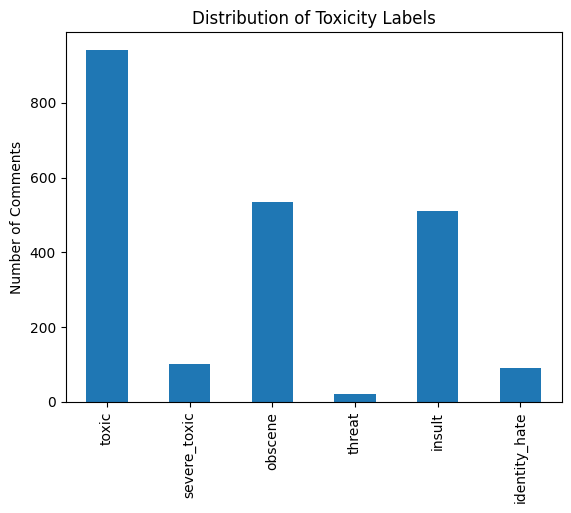

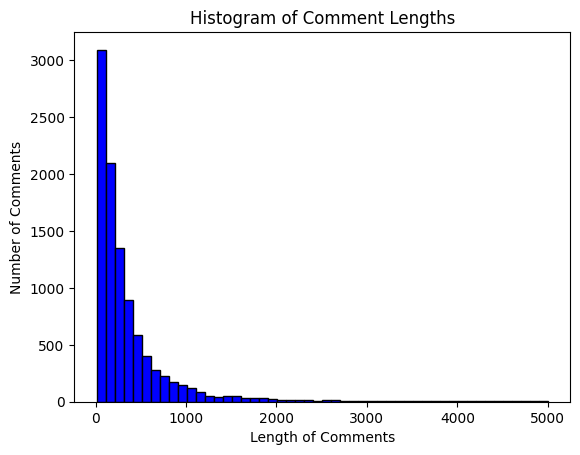

In [5]:
# Additional EDA: Exploring the distribution of different toxicity labels
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_df[label_cols].sum().plot(kind='bar')
plt.title('Distribution of Toxicity Labels')
plt.ylabel('Number of Comments')
plt.show()

# Analyzing comment length
train_df['comment_length'] = train_df['comment_text'].apply(len)
plt.hist(train_df['comment_length'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Comment Lengths')
plt.xlabel('Length of Comments')
plt.ylabel('Number of Comments')
plt.show()

In [6]:
# Preprocessing steps including text cleaning and vectorization
# Function to clean the text
def clean_text(text):
    # Removing special characters and digits
    text_clean = re.sub(r'[^a-zA-Z]', ' ', text)
    # Converting to lower case
    text_clean = text_clean.lower()
    return text_clean

# Apply cleaning function to the comment text
train_df['cleaned_text'] = train_df['comment_text'].apply(clean_text)

# Vectorizing the text using TfIdfVectorizer
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
tfidf_vectors = vectorizer.fit_transform(train_df['cleaned_text'])

print("Shape of the TfIdf matrix:", tfidf_vectors.shape)

Shape of the TfIdf matrix: (10000, 3000)


## Dimensionality Reduction

We will apply PCA and UMAP to reduce the dimensionality of our dataset.

Explained variance (2 components): 0.016080655686568454
Explained variance (3 components): 0.022774152343807065


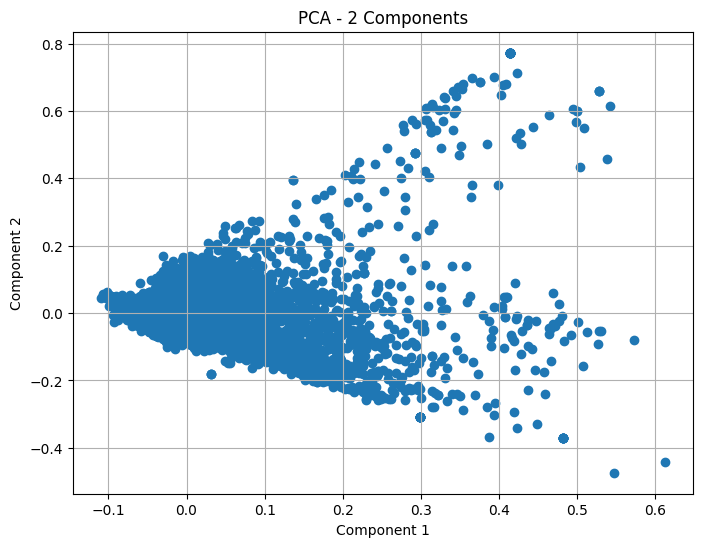

In [7]:
# Applying PCA for visualization: Reducing to 2 components
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(tfidf_vectors.toarray())

# Display the explained variance for 2 components
print("Explained variance (2 components):", pca_2d.explained_variance_ratio_.sum())

# Optionally, also reduce to 3 components for a different visualization
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(tfidf_vectors.toarray())

# Display the explained variance for 3 components
print("Explained variance (3 components):", pca_3d.explained_variance_ratio_.sum())

# Visualization of the PCA result (2D)
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1])
plt.title('PCA - 2 Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


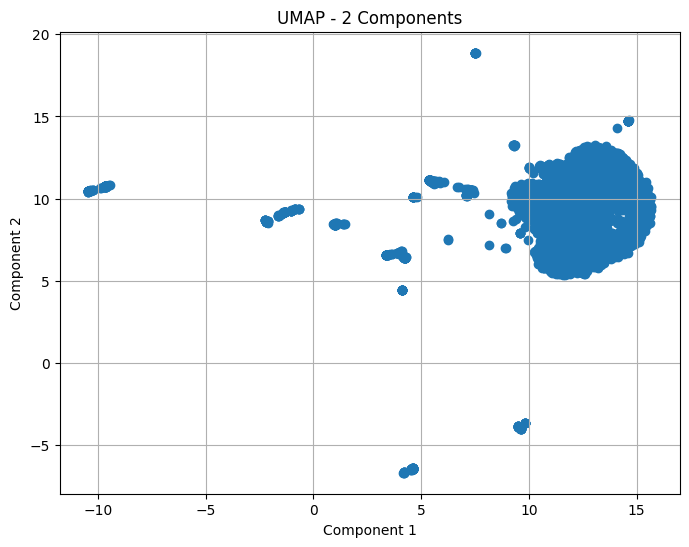

/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [8]:
import umap

# Applying UMAP to reduce the dataset to 2 components for visualization
umap_2d = umap.UMAP(n_components=2, random_state=42)
umap_2d_result = umap_2d.fit_transform(tfidf_vectors.toarray())

# Visualization of the 2D UMAP result
plt.figure(figsize=(8, 6))
plt.scatter(umap_2d_result[:, 0], umap_2d_result[:, 1])
plt.title('UMAP - 2 Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

# Optionally, also reduce to 3 components for a different perspective
umap_3d = umap.UMAP(n_components=3, random_state=42)
umap_3d_result = umap_3d.fit_transform(tfidf_vectors.toarray())

## Clustering

We will perform clustering using K-Means, DBSCAN, and Hierarchical Clustering methods.

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

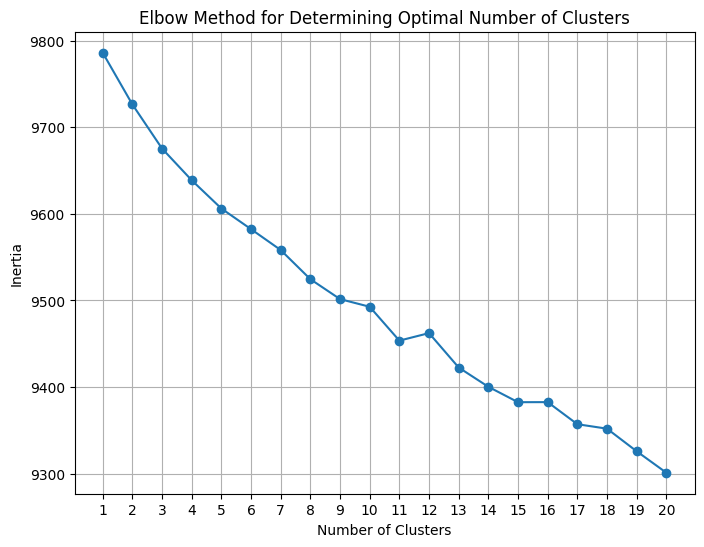

In [9]:
# Applying the Elbow Method to find the optimal number of clusters
inertia = []
k_range = range(1, 21) # Trying different numbers of clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_vectors.toarray())
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [10]:
# Choose the number of clusters where the elbow occurs
optimal_k = 5  # Replace with the appropriate number as per the elbow plot

# Performing K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(tfidf_vectors.toarray())

# The variable 'kmeans_clusters' now holds the cluster assignments for each data point

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
# Applying DBSCAN clustering
# Note: The parameters 'eps' and 'min_samples' may need to be adjusted
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(tfidf_vectors.toarray())

# dbscan_clusters now contains the cluster labels for each data point
# Noise points are labeled as -1

In [12]:
# Applying Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
hierarchical_clusters = hierarchical.fit_predict(tfidf_vectors.toarray())

# hierarchical_clusters now contains the cluster assignments for each data point

## Visualization

Finally, we will visualize the clusters created by each clustering method.

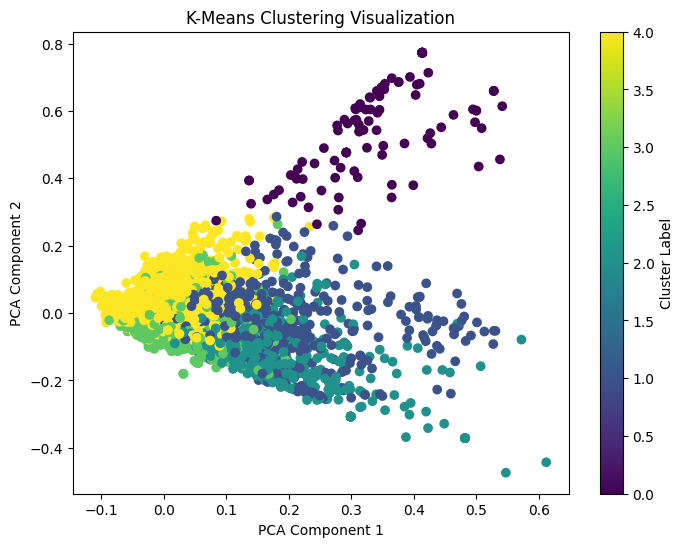

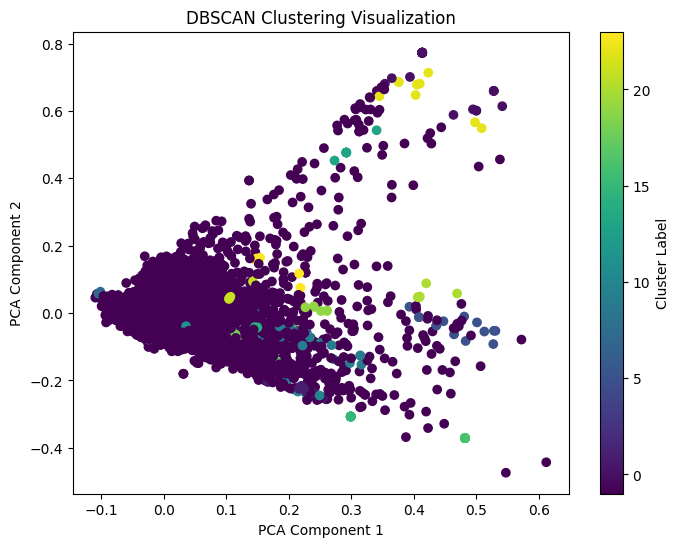

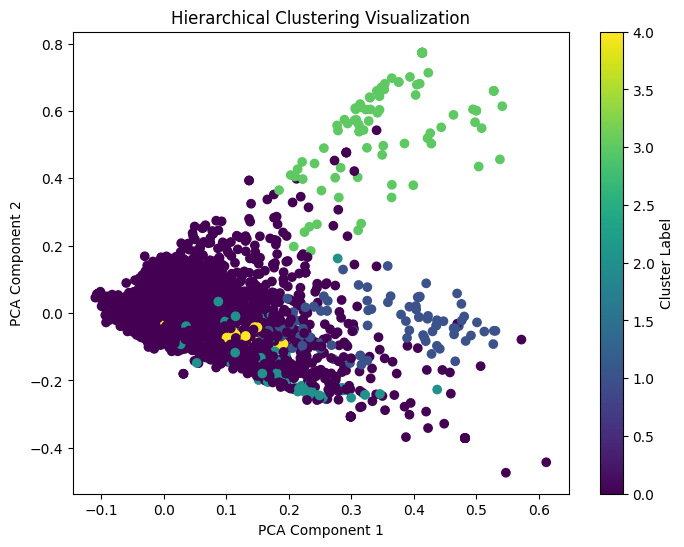

In [13]:
# Visualization for K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c=kmeans_clusters)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Visualization for DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c=dbscan_clusters)
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Visualization for Hierarchical Clustering
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d_result[:, 0], pca_2d_result[:, 1], c=hierarchical_clusters)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()